Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ self_attention_5                │ (None, 28, 28, 128)    │        49,152 │
│ (SelfAttention)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,988,996 (49.55 MB)

 Trainable params: 12,988,548 (49.55 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.3878 - loss: 14.4074 - val_accuracy: 0.3125 - val_loss: 6.0688 - learning_rate: 0.0010
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4688 - loss: 6.6456 - val_accuracy: 0.2500 - val_loss: 8.2105 - learning_rate: 0.0010
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.4266 - loss: 2.3498 - val_accuracy: 0.2031 - val_loss: 24.1689 - learning_rate: 0.0010
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4062 - loss: 1.5660 - val_accuracy: 0.1250 - val_loss: 32.2015 - learning_rate: 0.0010
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.4084 - loss: 1.4423 - val_accuracy: 0.2031 - val_loss: 37.8534 - learning_rate: 0.0010
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5312 - loss: 2.5427 - val_accuracy: 0.2500 - val_loss: 31.3853 - learning_rate: 0.0010
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5078 - loss: 1.2114 - val_accur

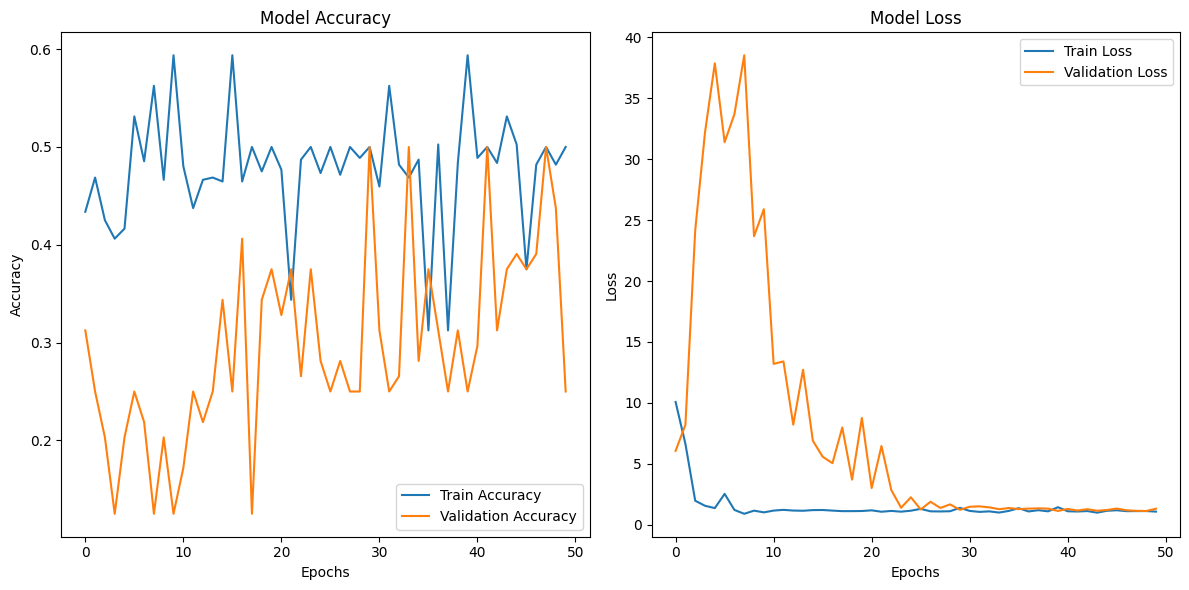

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Layer, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define Self-Attention Layer
class SelfAttention(Layer):
    def __init__(self):
        super(SelfAttention, self).__init__()
    
    def build(self, input_shape):
        self.Wq = self.add_weight(name="Wq", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform", trainable=True)
        self.Wk = self.add_weight(name="Wk", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform", trainable=True)
        self.Wv = self.add_weight(name="Wv", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform", trainable=True)
        self.scale = tf.math.sqrt(tf.cast(input_shape[-1], tf.float32))
        super(SelfAttention, self).build(input_shape)
    
    def call(self, inputs):
        query = tf.matmul(inputs, self.Wq)
        key = tf.matmul(inputs, self.Wk)
        value = tf.matmul(inputs, self.Wv)
        
        attention_scores = tf.matmul(query, key, transpose_b=True) / self.scale
        attention_weights = tf.nn.softmax(attention_scores, axis=-1)
        attention_output = tf.matmul(attention_weights, value)
        return attention_output

# Data Paths
train_path = (r"/Users/apple/Desktop/MAJOR_PROJECT/Data/train")
val_path = (r"/Users/apple/Desktop/MAJOR_PROJECT/Data/valid")
test_path = (r"/Users/apple/Desktop/MAJOR_PROJECT/Data/test")

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode="categorical")
val_data = val_test_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=32, class_mode="categorical")
test_data = val_test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode="categorical")

# CNN Model with Self-Attention
inputs = Input(shape=(224, 224, 3))

# Convolutional Block 1
x = Conv2D(32, (3, 3), activation="relu", padding="same")(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Convolutional Block 2
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Convolutional Block 3
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Apply Self-Attention
x = SelfAttention()(x)

# Flatten and Fully Connected Layers
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(len(train_data.class_indices), activation="softmax")(x)

# Compile Model
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

# Callbacks
callbacks = [
    ModelCheckpoint("best_cnn_attention_model.keras", save_best_only=True, monitor="val_accuracy", mode="max"),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-6, monitor="val_loss")
]

# Train Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=val_data.samples // val_data.batch_size,
    callbacks=callbacks
)

# Evaluate Model
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot Performance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

plt.tight_layout()
plt.show()